## Week 3: Predicting Diabetes using Decision Trees 
- Objective: Predict whether a person has diabetes based on health metrics using a decision tree model. 
- Skills: Decision Trees, Feature Importance, Model Tuning. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [21]:
# Load Dataset
df=pd.read_csv("diabetes.csv")

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape

(768, 9)

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
# Splitting Data into Train and Test Sets
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Training Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Predictions
y_pred = dt_model.predict(X_test)

In [29]:
# Evaluating the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[75 24]
 [15 40]]


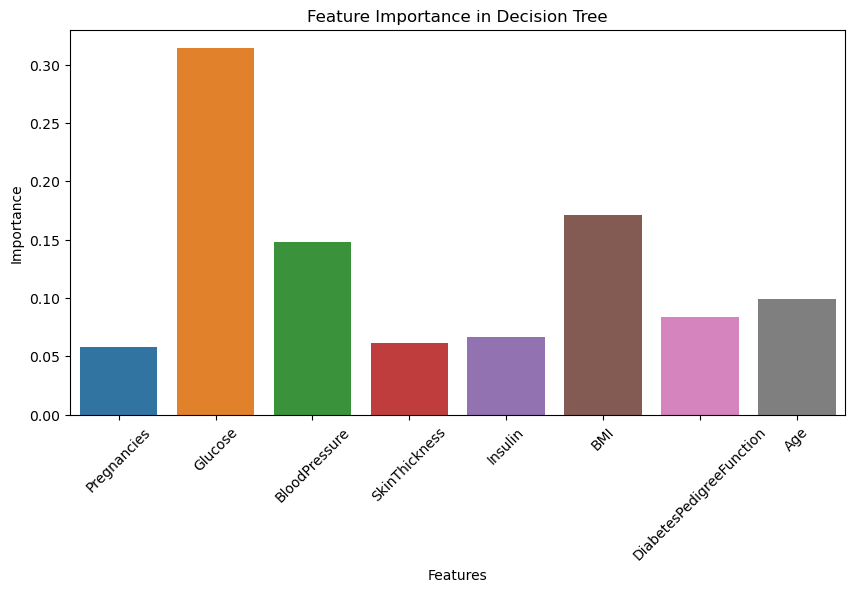

In [30]:
# Feature Importance
feature_importances = dt_model.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=feature_names, y=feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree")
plt.xticks(rotation=45)
plt.show()

In [31]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [32]:
# Final Model with Best Parameters
best_dt_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)
y_pred_best = best_dt_model.predict(X_test)

In [33]:
# Final Evaluation
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final Classification Report:\n", classification_report(y_test, y_pred_best))

Final Accuracy: 0.7597402597402597
Final Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



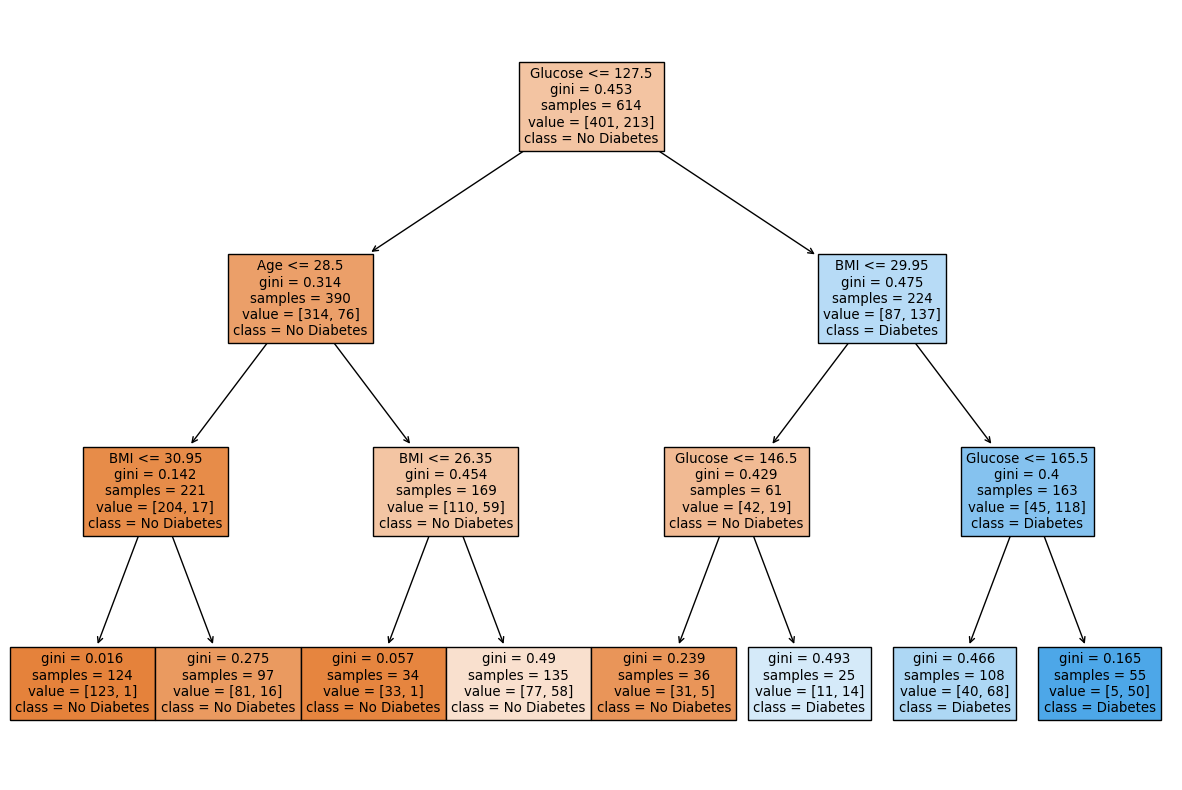

In [34]:
# Plotting the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(best_dt_model, feature_names=columns[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()